In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tqdm import tqdm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [3]:
# train_data1 = pd.read_csv("D:\\Personal\\Msc\\Y1S1\\Advanced Data Mining\\GroupAssignment\\web-traffic-time-series-forecasting\\TrainingData\\train_1.csv").fillna(0)
train_data2 = pd.read_csv("D:\\Personal\\Msc\\Y1S1\\Advanced Data Mining\\GroupAssignment\\web-traffic-time-series-forecasting\\TrainingData\\train_2.csv").fillna(0)

In [4]:
train_data2.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,19.0,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,32.0,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,6.0,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,7.0,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,16.0,19.0,9.0,20.0,23.0,28.0,14.0,8.0,7.0


In [5]:
name = []
for page in train_data2['Page']:
    split = page.split('.')
    name.append(split[-3])

train_data2['Name'] = name
train_data2['Language'] = train_data2['Name'].str[-2:]

Evaluate Data Stationarity

In [7]:
from statsmodels.tsa.stattools import adfuller

def stationarity_test(timeseries, rolling_window):
    plt.figure(figsize=(50, 8))
    
    rolling_mean = pd.DataFrame.rolling(timeseries, window=rolling_window).mean()
    rolling_std = pd.DataFrame.rolling(timeseries, window=rolling_window).std()

    plt.plot(timeseries, color='blue', label= 'Original')
    plt.legend(loc='best')
    
    plt.plot(rolling_mean, color='red', label= 'Rolling Mean')
    plt.legend(loc='best')
    
    std = plt.plot(rolling_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    
    # plt.title(f'Rolling Mean & Standard Deviation by Language : {language}')
    plt.title(f'Rolling Mean & Standard Deviation')
    plt.show()

     # Dickey-Fuller test
    print('Results of Dickey-Fuller Test')
    print()
    test = adfuller(timeseries, autolag='AIC')
    output = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
        output['Critical Value (%s)'%key] = value
    print(output)
    print('-'*100)

In [8]:
train_data2.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10,Name,Language
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0,2NE1_zh,zh
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0,2PM_zh,zh
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0,3C_zh,zh
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0,4minute_zh,zh
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.0,9.0,20.0,23.0,28.0,14.0,8.0,7.0,52_Hz_I_Love_You_zh,zh


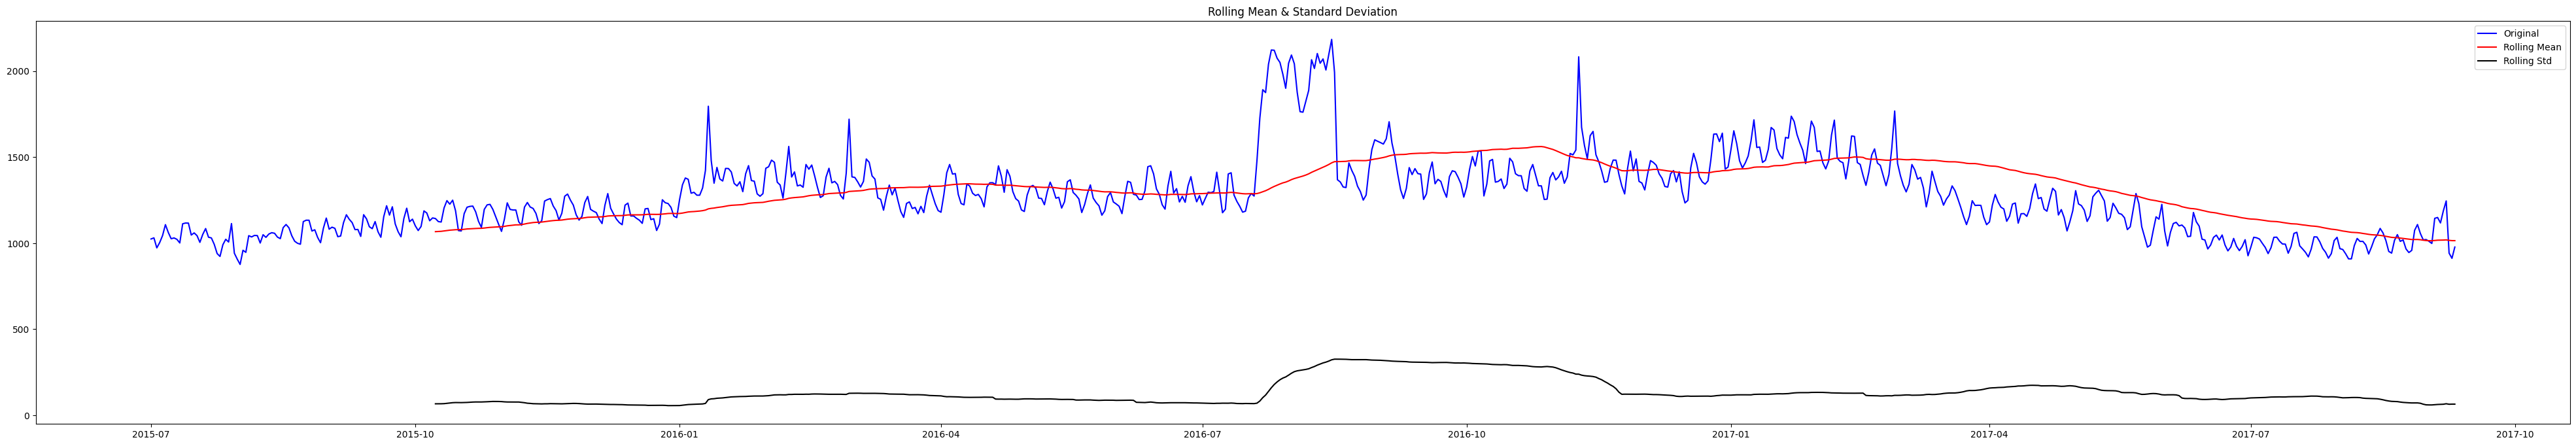

Results of Dickey-Fuller Test

Test Statistic                  -2.654568
p-value                          0.082235
#Lags Used                      21.000000
Number of Observations Used    781.000000
Critical Value (1%)             -3.438751
Critical Value (5%)             -2.865248
Critical Value (10%)            -2.568744
dtype: float64
----------------------------------------------------------------------------------------------------


In [9]:
remove_col = ['Language', 'Name']
pivot = train_data2.drop(remove_col, axis=1).melt(id_vars='Page', var_name='Date', value_name='Visits')
pivot['Date'] = pd.to_datetime(pivot['Date'])
pivot.fillna(0, inplace=True)

group_by = pivot.groupby('Date')['Visits'].mean()

stationarity_test(group_by, rolling_window=100)

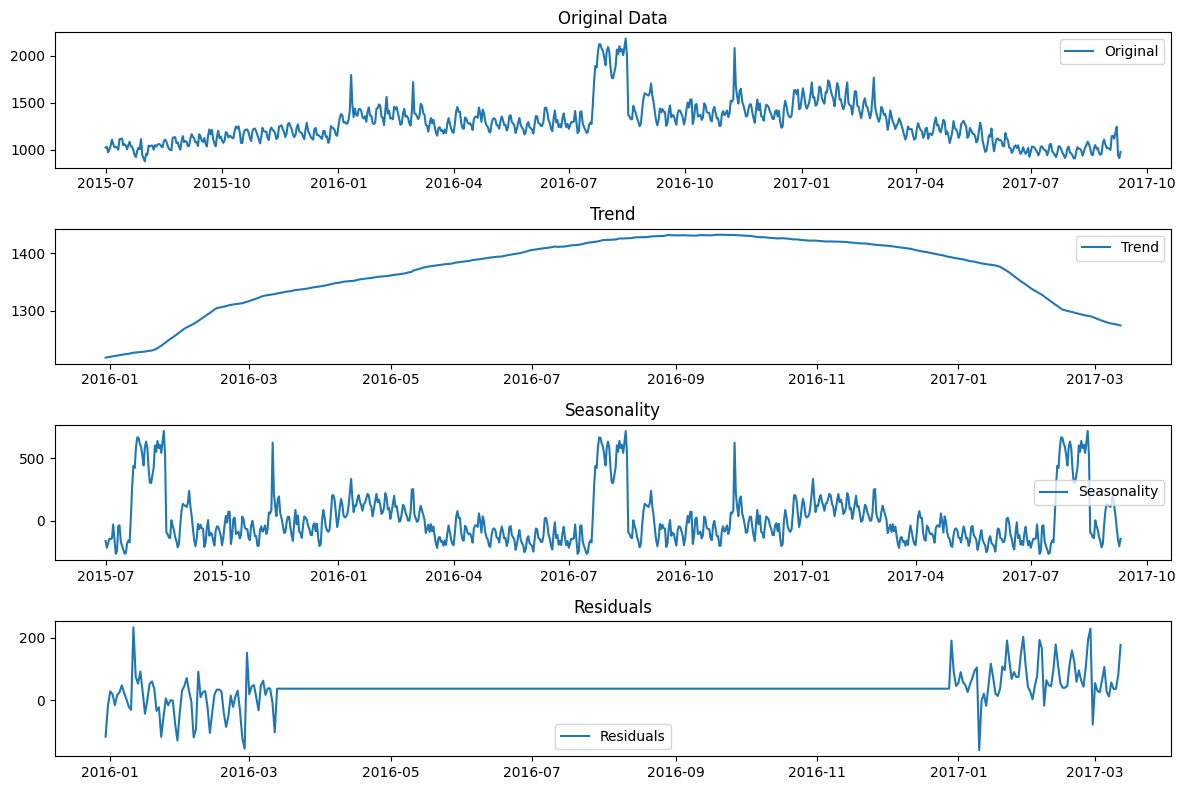

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming group_by is your time series data
decomposition = seasonal_decompose(group_by, model='additive', period=365) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(group_by, label='Original')
plt.legend(loc='best')
plt.title('Original Data')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.title('Trend')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.title('Seasonality')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.title('Residuals')

plt.tight_layout()
plt.show()


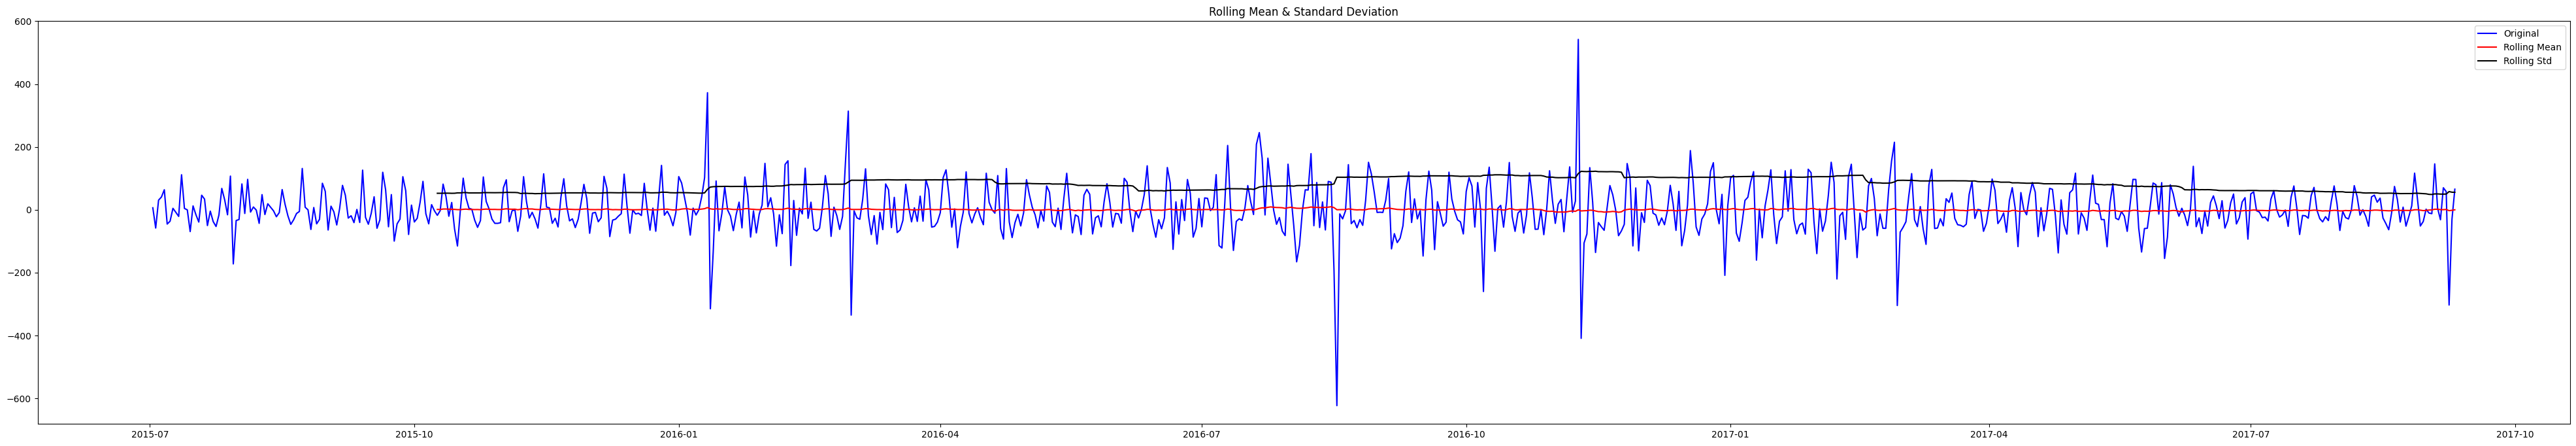

Results of Dickey-Fuller Test

Test Statistic                  -5.485482
p-value                          0.000002
#Lags Used                      21.000000
Number of Observations Used    780.000000
Critical Value (1%)             -3.438761
Critical Value (5%)             -2.865253
Critical Value (10%)            -2.568747
dtype: float64
----------------------------------------------------------------------------------------------------


In [11]:
group_by_diff = group_by.diff().dropna()  # Take the first difference to remove trend

# Perform the stationarity test on the differenced series
stationarity_test(group_by_diff, rolling_window=100)

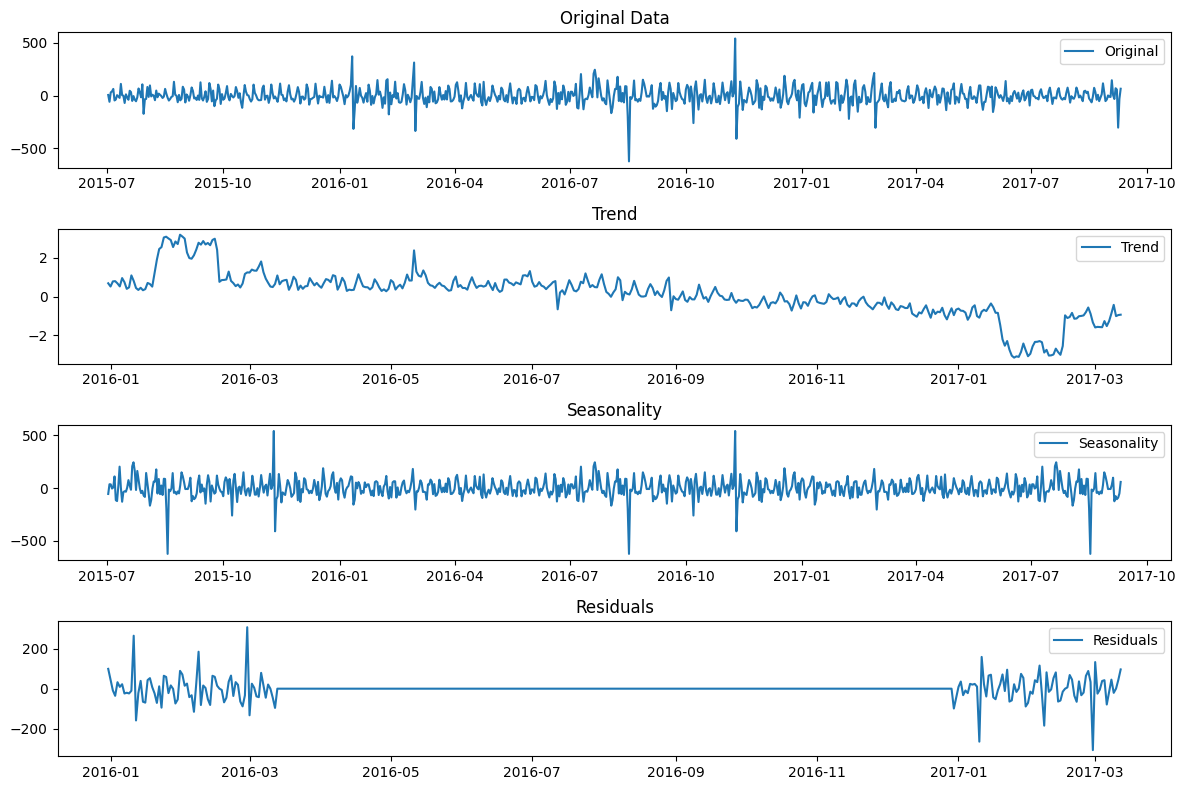

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming group_by is your time series data
decomposition = seasonal_decompose(group_by_diff, model='additive', period=365) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(group_by_diff, label='Original')
plt.legend(loc='best')
plt.title('Original Data')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.title('Trend')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.title('Seasonality')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.title('Residuals')

plt.tight_layout()
plt.show()

In [13]:
train_data2.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10,Name,Language
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0,2NE1_zh,zh
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0,2PM_zh,zh
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0,3C_zh,zh
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0,4minute_zh,zh
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.0,9.0,20.0,23.0,28.0,14.0,8.0,7.0,52_Hz_I_Love_You_zh,zh


In [14]:
pivot = train_data2.drop(['Name', 'Language'], axis=1)
train_pivot = pivot.melt(id_vars='Page', var_name='Date', value_name='Visits')

In [15]:
train_pivot.head(10)

,Page,Date,Visits
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,0.0
5,5566_zh.wikipedia.org_all-access_spider,2015-07-01,12.0
6,91Days_zh.wikipedia.org_all-access_spider,2015-07-01,0.0
7,A'N'D_zh.wikipedia.org_all-access_spider,2015-07-01,118.0
8,AKB48_zh.wikipedia.org_all-access_spider,2015-07-01,5.0
9,ASCII_zh.wikipedia.org_all-access_spider,2015-07-01,6.0


In [16]:
train_pivot.fillna(0, inplace=True)

In [17]:
train_pivot['Visits'] = train_pivot['Visits'].astype('float')

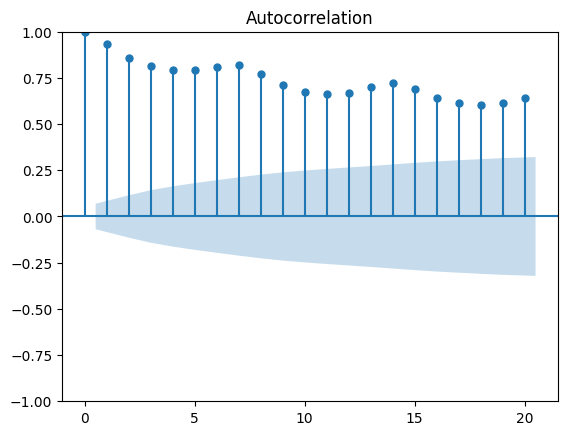

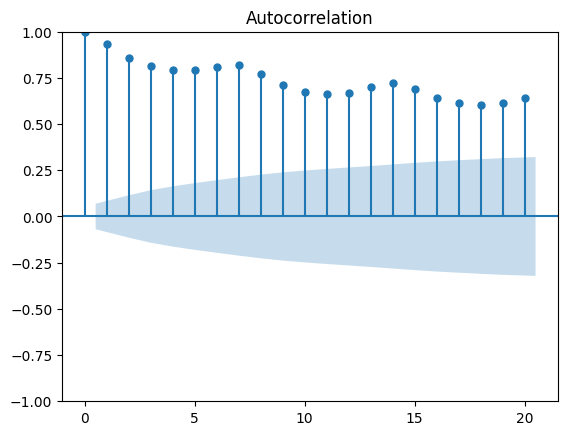

In [18]:
acf = train_pivot[['Date', 'Visits']].groupby(['Date'])['Visits'].mean()
plot_acf(acf, lags=20)

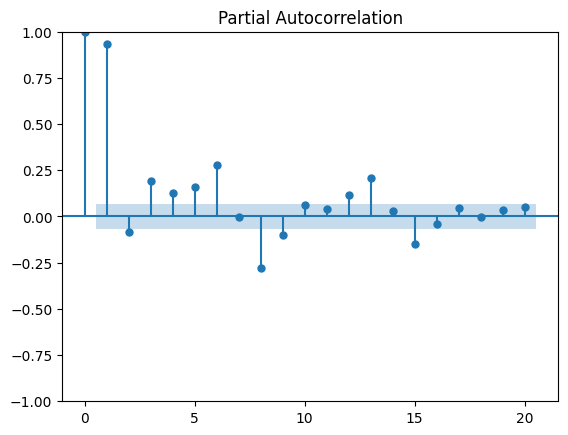

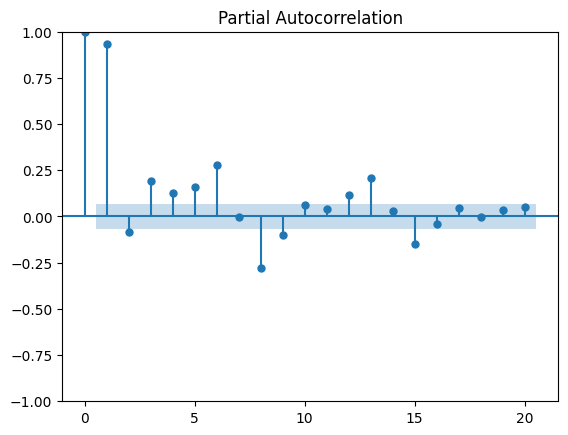

In [19]:
plot_pacf(acf, lags=20)

In [6]:
# SMAPE Metric
# def smape(actual, forecast):
#     result = 1/len(actual) * np.sum(2*np.abs(forecast-actual) / (np.abs(actual) + np.abs(forecast))*100)
#     return result

def smape(y_true, y_pred):
    """
    Calculate Symmetric Mean Absolute Percentage Error (SMAPE)
    """
    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(numerator / denominator) * 100

In [7]:
def plot_predictions(actual, predicted, figsize, title):
    
    plt.figure(figsize=figsize)
    actual = plt.plot(actual, color='blue', label='Actual')
    predicted = plt.plot(predicted, color='red', label='Predicted')
    plt.title(title)
    plt.legend()
    plt.show()

In [22]:
# data = train_data2.drop(['Page', 'Name', 'Language'], axis=1)
# data.fillna(0, inplace=True)

In [8]:
data = train_data2.drop(['Name', 'Language'], axis=1)
data.fillna(0, inplace=True)

In [9]:
data.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,19.0,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,32.0,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,6.0,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,7.0,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,16.0,19.0,9.0,20.0,23.0,28.0,14.0,8.0,7.0


AR Model

In [10]:
from statsmodels.tsa.ar_model import AutoReg

In [11]:
def AutoRegression(data, lags, test_days, visualize_prediction:bool=False):
    
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))
    
    train = scaled_data[:-test_days]

    test = scaled_data[-test_days:]
    
    ar = AutoReg(train, lags=lags)
    model = ar.fit()
    
    # Predict
    ## Training predictions
    train_start = 0
    train_end = len(train)

    train_pred = model.predict(start=train_start, end=train_end)

    # Identify positions of NaN values in train_pred
    nan_indices = np.isnan(train_pred)

    # Replace NaN values with 0s in train_pred
    train_pred[nan_indices] = 0

    ## Testing predictions
    test_start = len(train)

    test_end = len(train) + len(test)

    test_pred = model.predict(start=test_start, end=test_end)
    
    ## Inverse transform
    train_inverse = scaler.inverse_transform(train_pred.reshape(-1, 1))
    test_inverse = scaler.inverse_transform(test_pred.reshape(-1, 1))
    
    # Plot predictions
    if visualize_prediction:
        plot_predictions(train, train_pred, figsize=(20, 6), title='AR Trainig (In Fold) Predictions')
        plot_predictions(test, test_pred, figsize=(20, 6), title='AR Testing (Out of Fold) Predictions')
    
    train_error = smape(train, train_pred)
    test_error = smape(test, test_pred)
    
    print(f'Train Error: {train_error} | Test Error: {test_error}')

    return model

In [16]:
# Define an empty list to store the rows of the final DataFrame
predicted_data = []

# Iterate over each row in the original DataFrame
for idx, row in data.iterrows():
    # Select all columns except the first one
    row_values = row.iloc[1:].values
    
    # Run AutoRegression model to get predictions
    model = AutoRegression(idx, row_values, 30, 31, False)
    
    # Get the page name from the index
    page_name = row.name
    
    # Iterate over the predictions and add them to the list
    for i, prediction in enumerate(model.predictions):
        # Calculate the date for the prediction
        prediction_date = row['Date'] + pd.Timedelta(days=i)
        
        # Append the page name and prediction date along with the prediction value
        predicted_data.append([f"{page_name}_{prediction_date}", prediction])

# Create a DataFrame from the predicted data list
predicted_df = pd.DataFrame(predicted_data, columns=['Page', 'PredictedVisitfor the date'])

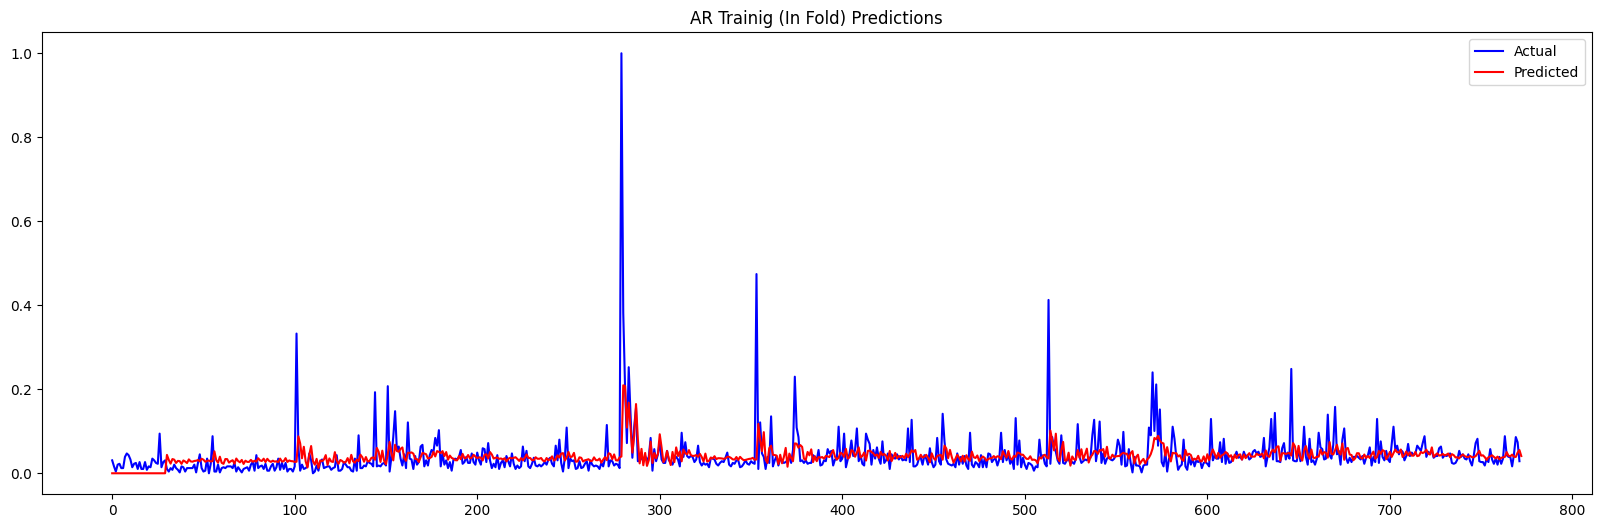

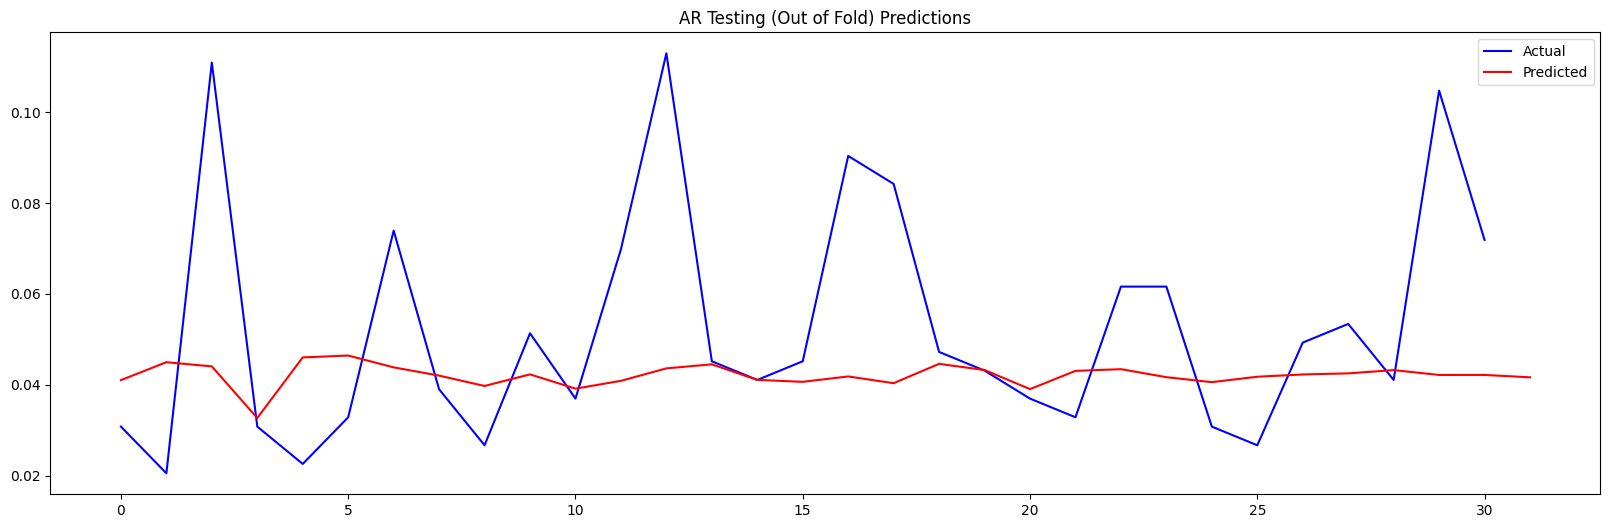

Train Error: nan | Test Error: 36.59850002433412


C:\Users\de\AppData\Local\Temp\ipykernel_16796\592766158.py:12: RuntimeWarning: invalid value encountered in divide
  return np.mean(numerator / denominator) * 100


In [25]:
train = data.iloc[0, 1:].values
model = AutoRegression(train, 30, 31, True)

ARIMA

In [26]:
from statsmodels.tsa.arima.model import ARIMA

In [27]:
def Arima(data, p, d, q, test_days, visualize_predictions=False):

    train_date = data[:-31]
    test_date = data[-31:]

    data = data.astype('float')
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))

    #scaled_data.index = pd.to_datetime(data.index)
    train = scaled_data[:-31]
    test = scaled_data[-31:]

    #print(train), print(type(train)), print(train.shape), print(len(train))
    train = pd.Series(train.reshape(len(train)), index=pd.to_datetime(train_date.index))
    test = pd.Series(test.reshape(len(test)), index=pd.to_datetime(test_date.index))

    arima = ARIMA(train, order=[p, d, q])
    model = arima.fit()

    # Predict
     ## Training predictions
    train_start = 0
    train_end = len(train)
    train_pred = model.predict(start=train_start, end=train_end, typ='levels')

    ## Testing predictions
    test_start = len(train)
    test_end = len(train) + len(test) - 1
    test_pred = model.predict(start=test_start, end=test_end, typ='levels')

    # Inverse transform
    train_inverse = scaler.inverse_transform(np.array(train_pred).reshape(-1, 1))
    test_inverse = scaler.inverse_transform(np.array(test_pred).reshape(-1, 1))

    #print(test_pred)

    if visualize_predictions:
        plot_predictions(train, train_pred, (20, 5), 'ARIMA Training Predictions')
        plot_predictions(test, test_pred, (20, 5), 'ARIMA Testing Predictions')

    train_error = smape(train, train_pred)
    test_error = smape(test, test_pred)
    
    print(f'Train Error: {train_error} | Test Error: {test_error}')
    
    return model

In [28]:
row = data.iloc[0, :]

d:\Personal\Msc\Y1S1\Advanced Data Mining\GroupAssignment\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Personal\Msc\Y1S1\Advanced Data Mining\GroupAssignment\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Personal\Msc\Y1S1\Advanced Data Mining\GroupAssignment\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Personal\Msc\Y1S1\Advanced Data Mining\GroupAssignment\myenv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\P

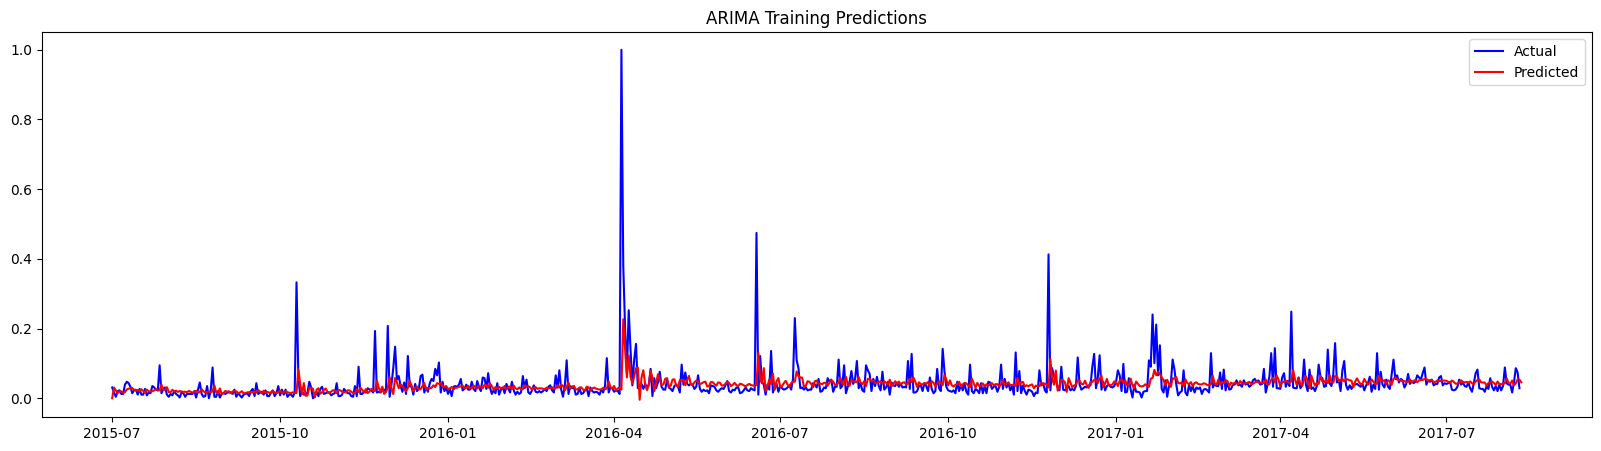

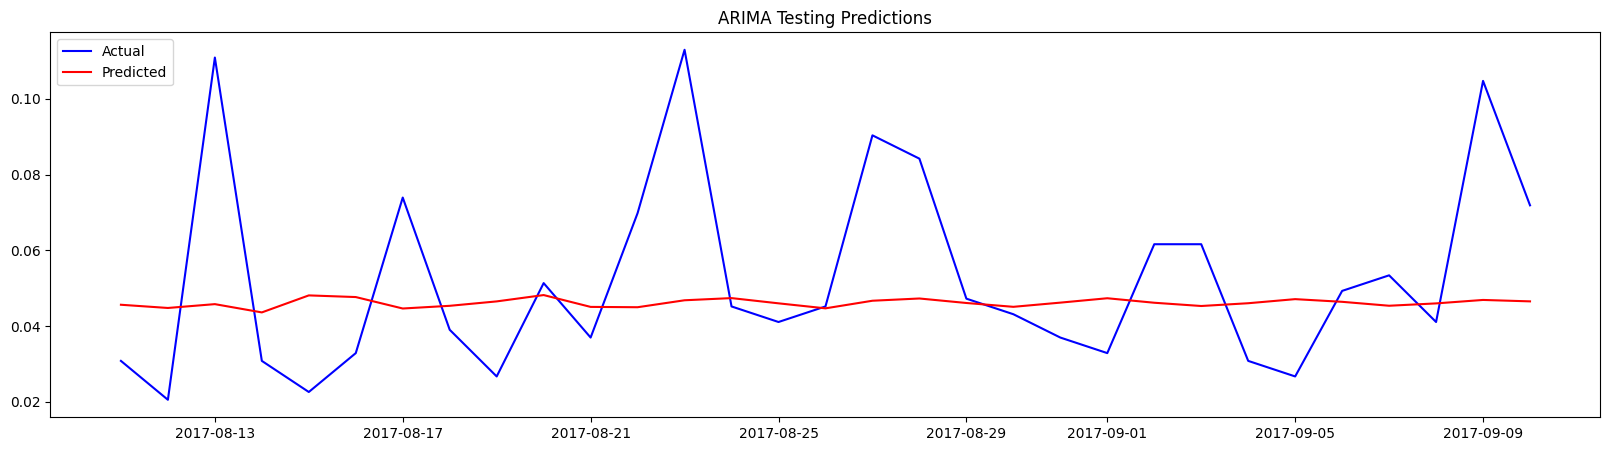

Train Error: 52.301012226131505 | Test Error: 36.10568190727074


In [29]:
model = Arima(row, 5, 1, 5, 31, visualize_predictions=True)

LSTM

In [30]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras import Sequential
from sklearn.metrics import mean_squared_error

In [31]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

In [32]:
def Lstm(x_train, y_train, input_shape, num_lstm, epochs):
    
    model = Sequential()
    model.add(LSTM(num_lstm, input_shape=input_shape))
    model.add(Dense(1))
    
    model.compile(
        loss='mean_squared_error',
        optimizer='adam'
    )
    
    es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
    
    model.fit(x_train, y_train, epochs=epochs, batch_size=1, verbose=0, callbacks=[es])
    
    return model

In [33]:
def run_lstm(data, num_lstm, epochs, visualize_predictions=False):

    # Scale the visits
    scaler = MinMaxScaler()
    scaled_row = scaler.fit_transform(np.array(data).reshape(-1, 1))
    
    # split into training and testing
    train_data = scaled_row[:-31]
    test_data = scaled_row[-31:]
    
    # Transform the dataset
    x_train, y_train = create_dataset(train_data.reshape(-1, 1))
    x_test, y_test = create_dataset(test_data.reshape(-1, 1))

    # Reshape the data for the lstm model
    x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
    x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

    model = Lstm(x_train, y_train, (1, 1), num_lstm, epochs)

    # test the model
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    
    train_pred_inverse = scaler.inverse_transform(train_pred)
    train_true_inverse = scaler.inverse_transform([y_train])
    test_pred_inverse = scaler.inverse_transform(test_pred)
    test_true_inverse = scaler.inverse_transform([y_test])

    if visualize_predictions:
        plot_predictions(y_train.reshape(-1, 1), train_pred, figsize=(20, 5), title='LSTM Training Predictions')
        plot_predictions(y_test.reshape(-1, 1), test_pred, figsize=(20, 5), title='LSTM Testing Predictions')
    
    # Error
    train_error_mae = mean_squared_error(y_train.reshape(-1, 1), train_pred)
    test_error_mae = mean_squared_error(y_test.reshape(-1, 1), test_pred)
    
    train_error_smape = smape(y_train, train_pred)
    test_error_smape = smape(y_test, test_pred)
    
    print('Mean Squared Error')
    print(f'Train Error: {train_error_mae} | Test Error: {test_error_mae}')
    print('-' * 100)
    print('SMAPE')
    print(f'Train Error: {train_error_smape} | Test Error: {test_error_smape}')

    return model


1/1 [==============================] - 0s 20ms/step


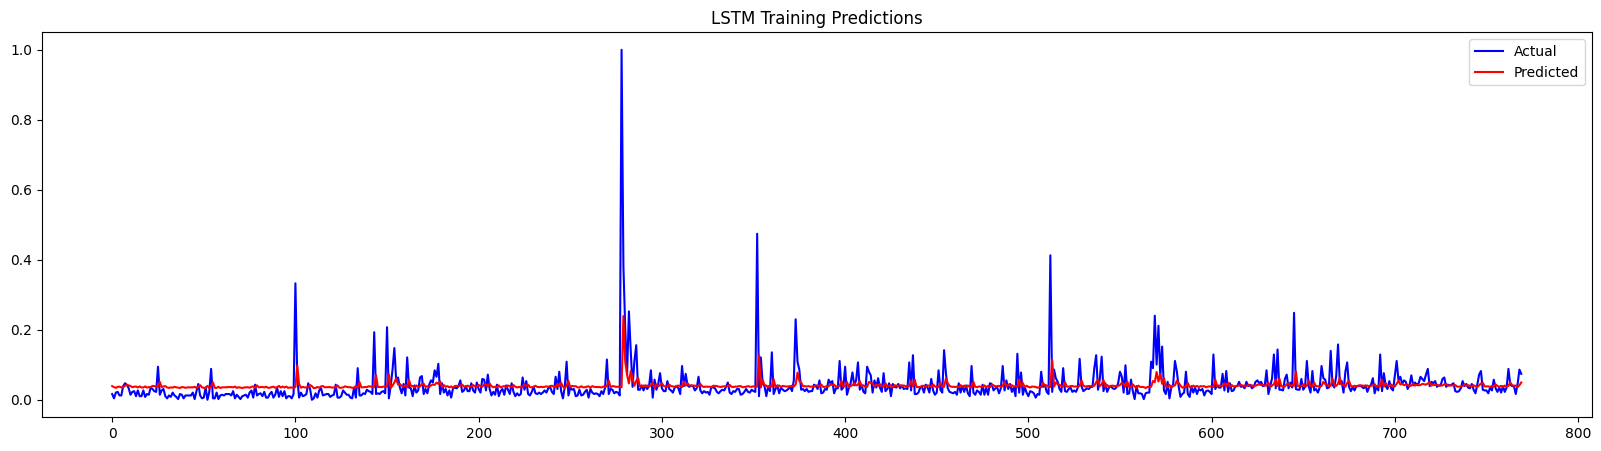

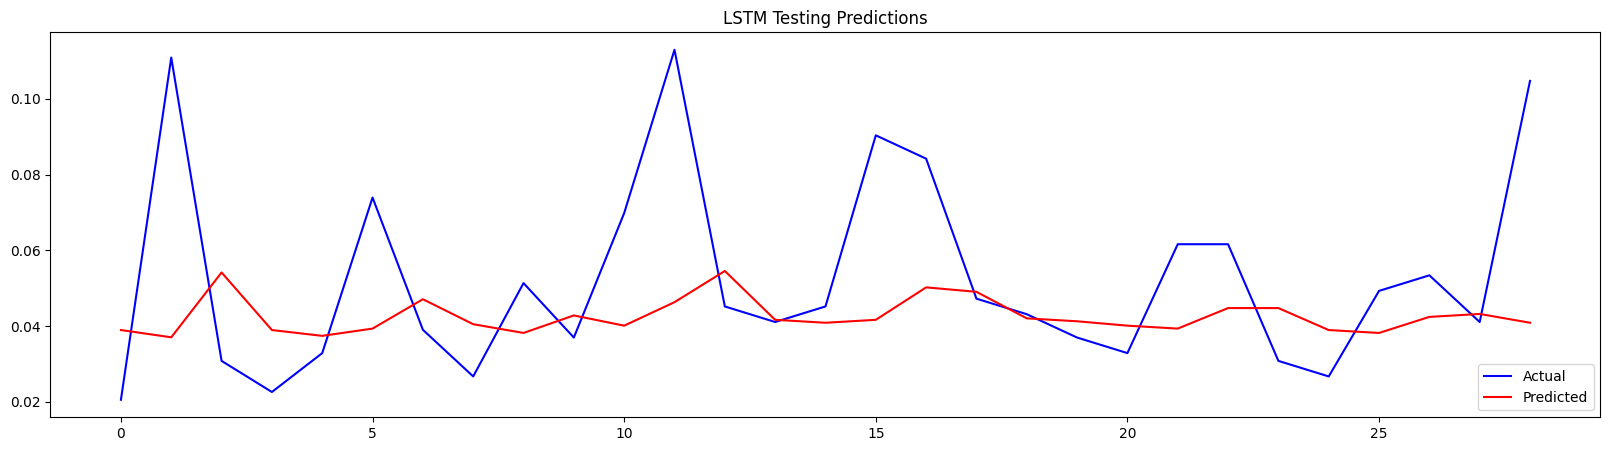

Mean Squared Error
Train Error: 0.00282955952166307 | Test Error: 0.0007851383479596263
----------------------------------------------------------------------------------------------------
SMAPE
Train Error: 58.487988445399 | Test Error: 36.83709002815818


In [34]:
row = data.iloc[0, :]
model_lstm = run_lstm(row, 10, 10, True)

XGBoost

In [35]:
from xgboost import XGBRegressor

In [36]:
def xgboost(data, estimators, visualize_predictions):
    
    # Split into training and testing
    train = row[:-31].values
    test = row[-31:].values
    
    x_train, y_train = create_dataset(train.reshape(-1, 1))
    x_test, y_test = create_dataset(test.reshape(-1, 1))
    
    model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
    model.fit(x_train, y_train)
    
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    
    train_error = smape(y_train, train_pred)
    test_error = smape(y_test, test_pred)

    if visualize_predictions:
        plot_predictions(y_train, train_pred, figsize=(15, 4), title='Training Predictions')
        plot_predictions(y_test, test_pred, figsize=(15, 4), title='Testing Predictions')
    
    print(f'Train Error: {train_error} | Test Error: {test_error}')
    
    return model

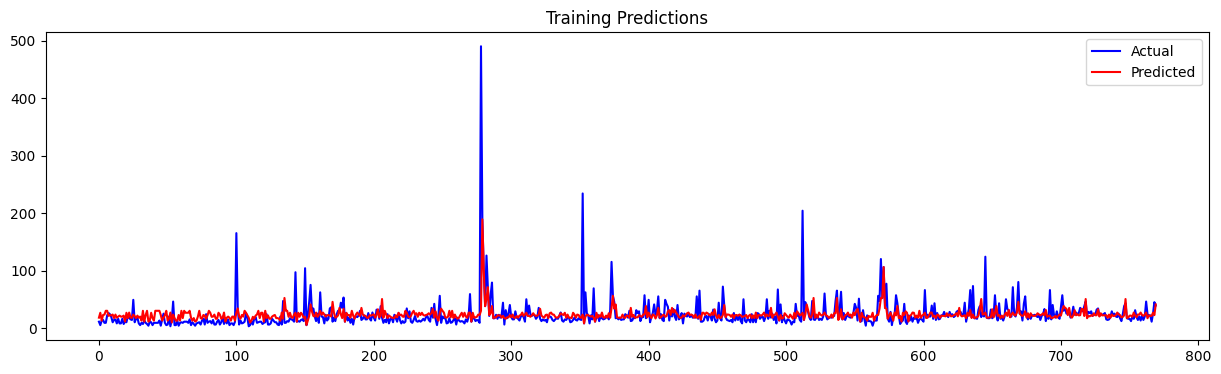

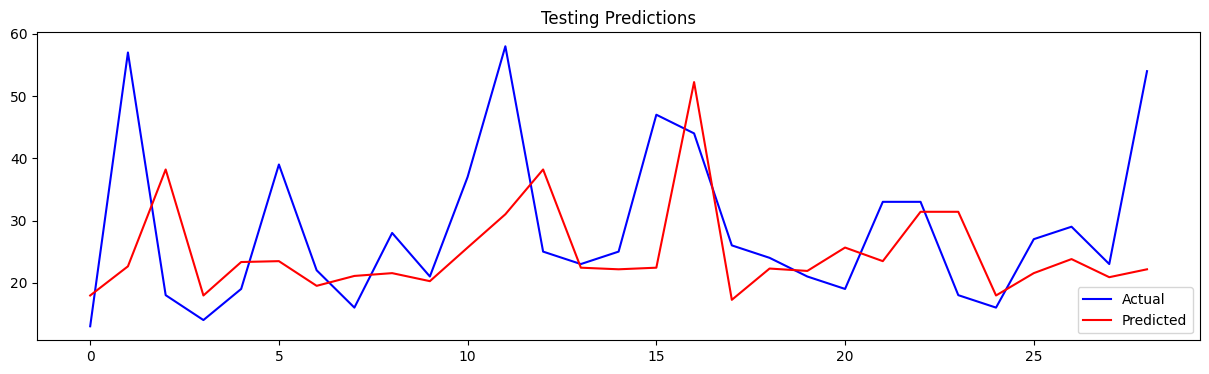

Train Error: 44.36048396527756 | Test Error: 31.631688521124403


In [37]:
row_xg = data.iloc[1, :]
model_xgb = xgboost(row_xg, 2000, True)